<a href="https://www.kaggle.com/code/alparslanulusoy/kred-siniflandirma?scriptVersionId=209172463" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

## KREDİ SINIFLANDIRMASI VERİ ANALİZİ 

<div style="color:#009de1">
    
<span style="font-size:22px;font-family:Tahoma;color:#009de1"> DATASET İÇERİĞİ </span>
<hr style="height:0.6px;background-color:#009de1">
</div>

<p style="font-family:tahoma;text-align:justify" >

Bu veri seti, kredi riskinin değerlendirilmesinde çok önemli bir rol oynayan demografik ayrıntıları, finansal geçmişleri ve ödeme modellerini kapsayan müşteri profillerinin kapsamlı bir görünümünü sunar. Amaç, Makine Öğrenimi ve Derin Öğrenme Algoritmalarını eğitmeye uygun temel özellikleri belirlemek için bu verileri temizlemek ve analiz etmektir.


| **No** | **INPUTS**                  | **İÇERİK**                                                                                  |
|-------|-----------------------------|--------------------------------------------------------------------------------------------------|
| 1     | **ID**                       | Her bir kayıt için benzersiz kimlik numarası.                                                   |
| 2     | **Customer_ID**              | Her bir müşteri için benzersiz kimlik numarası.                                                 |
| 3     | **Month**                    | İşlem veya kaydın gerçekleştiği ay.                                                             |
| 4     | **Name**                     | Müşterinin adı.                                                                                 |
| 5     | **Age**                      | Müşterinin yaşı.                                                                                |
| 6     | **SSN**                      | Müşterinin sosyal güvenlik numarası.                                                            |
| 7     | **Occupation**               | Müşterinin mesleği.                                                                             |
| 8     | **Annual_Income**            | Müşterinin yıllık geliri.                                                                       |
| 9     | **Monthly_Inhand_Salary**    | Müşterinin aylık net maaşı.                                                                     |
| 10    | **Num_Bank_Accounts**        | Müşterinin sahip olduğu toplam banka hesabı sayısı.                                             |
| 11    | **Num_Credit_Card**          | Müşterinin sahip olduğu toplam kredi kartı sayısı.                                              |
| 12    | **Interest_Rate**            | Kredilere veya borçlara uygulanan faiz oranı.                                                   |
| 13    | **Num_of_Loan**              | Müşterinin kullandığı kredi sayısı.                                                             |
| 14    | **Type_of_Loan**             | Müşterinin aldığı kredi türleri.                                                                |
| 15    | **Delay_from_due_date**      | Ödeme tarihine göre gecikme süresi.                                                             |
| 16    | **Num_of_Delayed_Payment**   | Müşterinin yaptığı toplam geç ödeme sayısı.                                                     |
| 17    | **Changed_Credit_Limit**     | Müşterinin kredi limitinde yapılan değişiklikler.                                               |
| 18    | **Num_Credit_Inquiries**     | Müşterinin krediyle ilgili yaptığı sorgulama sayısı.                                            |
| 19    | **Credit_Mix**               | Müşterinin kullandığı kredi türlerinin çeşitliliği (örneğin krediler, kredi kartları).           |
| 20    | **Outstanding_Debt**         | Müşterinin mevcut toplam borç miktarı.                                                          |
| 21    | **Credit_Utilization_Ratio** | Kullanılan kredi miktarının toplam kredi limitine oranı.                                         |
| 22    | **Credit_History_Age**       | Müşterinin kredi geçmişinin süresi.                                                             |
| 23    | **Payment_of_Min_Amount**    | Müşterinin her ay minimum ödeme tutarını ödeyip ödemediği.                                       |
| 24    | **Total_EMI_per_month**      | Müşterinin her ay ödediği toplam Eşit Taksit Tutarı (EMI).                                       |
| 25    | **Amount_invested_monthly**  | Müşterinin her ay yaptığı yatırım tutarı.                                                       |
| 26    | **Payment_Behaviour**        | Müşterinin ödeme alışkanlıkları ve eğilimleri.                                                   |
| 27    | **Monthly_Balance**          | Müşterinin her ay sonunda hesabında kalan bakiye.                                               |
| 28    | **Credit_Score**             | Müşterinin kredi skoru (hedef değişken: "İyi," "Zayıf," "Orta").                                |

In [1]:
#Gerekli Kütüphanelerin yüklenmesi

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns 
import missingno as msno

# Dataset

In [2]:
df = pd.read_csv("/kaggle/input/credit-score-classification/train.csv")
df.head(20)

/tmp/ipykernel_17/395149409.py:1: DtypeWarning: Columns (26) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv("/kaggle/input/credit-score-classification/train.csv")


,ID,Customer_ID,Month,Name,Age,SSN,Occupation,Annual_Income,Monthly_Inhand_Salary,Num_Bank_Accounts,...,Credit_Mix,Outstanding_Debt,Credit_Utilization_Ratio,Credit_History_Age,Payment_of_Min_Amount,Total_EMI_per_month,Amount_invested_monthly,Payment_Behaviour,Monthly_Balance,Credit_Score
0,0x1602,CUS_0xd40,January,Aaron Maashoh,23,821-00-0265,Scientist,19114.12,1824.843333,3,...,_,809.98,26.822620,22 Years and 1 Months,No,49.574949,80.41529543900253,High_spent_Small_value_payments,312.49408867943663,Good
1,0x1603,CUS_0xd40,February,Aaron Maashoh,23,821-00-0265,Scientist,19114.12,NaN,3,...,Good,809.98,31.944960,NaN,No,49.574949,118.28022162236736,Low_spent_Large_value_payments,284.62916249607184,Good
2,0x1604,CUS_0xd40,March,Aaron Maashoh,-500,821-00-0265,Scientist,19114.12,NaN,3,...,Good,809.98,28.609352,22 Years and 3 Months,No,49.574949,81.699521264648,Low_spent_Medium_value_payments,331.2098628537912,Good
3,0x1605,CUS_0xd40,April,Aaron Maashoh,23,821-00-0265,Scientist,19114.12,NaN,3,...,Good,809.98,31.377862,22 Years and 4 Months,No,49.574949,199.4580743910713,Low_spent_Small_value_payments,223.45130972736786,Good
4,0x1606,CUS_0xd40,May,Aaron Maashoh,23,821-00-0265,Scientist,19114.12,1824.843333,3,...,Good,809.98,24.797347,22 Years and 5 Months,No,49.574949,41.420153086217326,High_spent_Medium_value_payments,341.48923103222177,Good
5,0x1607,CUS_0xd40,June,Aaron Maashoh,23,821-00-0265,Scientist,19114.12,NaN,3,...,Good,809.98,27.262259,22 Years and 6 Months,No,49.574949,62.430172331195294,!@9#%8,340.4792117872438,Good
6,0x1608,CUS_0xd40,July,Aaron Maashoh,23,821-00-0265,Scientist,19114.12,1824.843333,3,...,Good,809.98,22.537593,22 Years and 7 Months,No,49.574949,178.3440674122349,Low_spent_Small_value_payments,244.5653167062043,Good
7,0x1609,CUS_0xd40,August,NaN,23,#F%$D@*&8,Scientist,19114.12,1824.843333,3,...,Good,809.98,23.933795,NaN,No,49.574949,24.785216509052056,High_spent_Medium_value_payments,358.12416760938714,Standard
8,0x160e,CUS_0x21b1,January,Rick Rothackerj,28_,004-07-5839,_______,34847.84,3037.986667,2,...,Good,605.03,24.464031,26 Years and 7 Months,No,18.816215,104.291825168246,Low_spent_Small_value_payments,470.69062692529184,Standard
9,0x160f,CUS_0x21b1,February,Rick Rothackerj,28,004-07-5839,Teacher,34847.84,3037.986667,2,...,Good,605.03,38.550848,26 Years and 8 Months,No,18.816215,40.39123782853101,High_spent_Large_value_payments,484.5912142650067,Good


Veri setinde genel olarak eksik, hatalı veya tutarsız değerler bulunmaktadır. İsimler, yaşlar, meslekler, aylık kazanç, kredi türü çeşitliliği, kredi geçmişi süresi , minimum ödeme durumu , aylık yatırım tutarı  ve ödeme davranışları gibi sütunlarda eksik veya hatalı veriler mevcuttur. Bu durum, veri temizleme ve düzenleme işlemlerinin gerekli olduğunu göstermektedir.

In [3]:
df.shape

(100000, 28)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 28 columns):
 #   Column                    Non-Null Count   Dtype  
---  ------                    --------------   -----  
 0   ID                        100000 non-null  object 
 1   Customer_ID               100000 non-null  object 
 2   Month                     100000 non-null  object 
 3   Name                      90015 non-null   object 
 4   Age                       100000 non-null  object 
 5   SSN                       100000 non-null  object 
 6   Occupation                100000 non-null  object 
 7   Annual_Income             100000 non-null  object 
 8   Monthly_Inhand_Salary     84998 non-null   float64
 9   Num_Bank_Accounts         100000 non-null  int64  
 10  Num_Credit_Card           100000 non-null  int64  
 11  Interest_Rate             100000 non-null  int64  
 12  Num_of_Loan               100000 non-null  object 
 13  Type_of_Loan              88592 non-null   ob

In [5]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Monthly_Inhand_Salary,84998.0,4194.170850,3183.686167,303.645417,1625.568229,3093.745000,5957.448333,15204.633333
Num_Bank_Accounts,100000.0,17.091280,117.404834,-1.000000,3.000000,6.000000,7.000000,1798.000000
Num_Credit_Card,100000.0,22.474430,129.057410,0.000000,4.000000,5.000000,7.000000,1499.000000
Interest_Rate,100000.0,72.466040,466.422621,1.000000,8.000000,13.000000,20.000000,5797.000000
Delay_from_due_date,100000.0,21.068780,14.860104,-5.000000,10.000000,18.000000,28.000000,67.000000
Num_Credit_Inquiries,98035.0,27.754251,193.177339,0.000000,3.000000,6.000000,9.000000,2597.000000
Credit_Utilization_Ratio,100000.0,32.285173,5.116875,20.000000,28.052567,32.305784,36.496663,50.000000
Total_EMI_per_month,100000.0,1403.118217,8306.041270,0.000000,30.306660,69.249473,161.224249,82331.000000


Bu veri setinde bazı sütunlar mantıklı aralıklarda değerler içerirken, bazıları ciddi veri tutarsızlıklarına sahiptir. **Monthly_Inhand_Salary** ve **Credit_Utilization_Ratio** sütunları genel olarak makul görünüyor; maaşlar geniş bir aralıkta olsa da mantıklı değerlere sahip ve kredi kullanım oranı düşük bir standart sapma ile tutarlı. Ancak, **Num_Bank_Accounts**, **Num_Credit_Card**, **Interest_Rate**, ve **Total_EMI_per_month** gibi sütunlar aşırı uç değerlere sahiptir; örneğin, 1798 banka hesabı, 1499 kredi kartı ya da %5797 faiz oranı gibi gerçek dışı rakamlar dikkat çekmektedir. Ayrıca, negatif değerler (ör. gecikme süresi veya banka hesap sayısı) ve aşırı geniş standart sapmalar veri hatalarına işaret etmektedir. Bu nedenle, veri setinin temizlenmesi ve aşırı uç değerlerin yeniden değerlendirilmesi gereklidir.

In [6]:
df.describe(include="object").T

,count,unique,top,freq
ID,100000,100000,0x1602,1
Customer_ID,100000,12500,CUS_0xd40,8
Month,100000,8,January,12500
Name,90015,10139,Langep,44
Age,100000,1788,38,2833
SSN,100000,12501,#F%$D@*&8,5572
Occupation,100000,16,_______,7062
Annual_Income,100000,18940,36585.12,16
Num_of_Loan,100000,434,3,14386
Type_of_Loan,88592,6260,Not Specified,1408


Bu veri setinde bazı sütunlar mantıklı aralıklarda değerler içerirken, bazıları ciddi veri tutarsızlıklarına sahiptir. **Monthly_Inhand_Salary** ve **Credit_Utilization_Ratio** sütunları genel olarak makul görünüyor; maaşlar geniş bir aralıkta olsa da mantıklı değerlere sahip ve kredi kullanım oranı düşük bir standart sapma ile tutarlı. Ancak, **Num_Bank_Accounts**, **Num_Credit_Card**, **Interest_Rate**, ve **Total_EMI_per_month** gibi sütunlar aşırı uç değerlere sahiptir; örneğin, 1798 banka hesabı, 1499 kredi kartı ya da %5797 faiz oranı gibi gerçek dışı rakamlar dikkat çekmektedir. Ayrıca, negatif değerler (ör. gecikme süresi veya banka hesap sayısı) ve aşırı geniş standart sapmalar veri hatalarına işaret etmektedir. Bu nedenle, veri setinin temizlenmesi ve aşırı uç değerlerin yeniden değerlendirilmesi gereklidir.

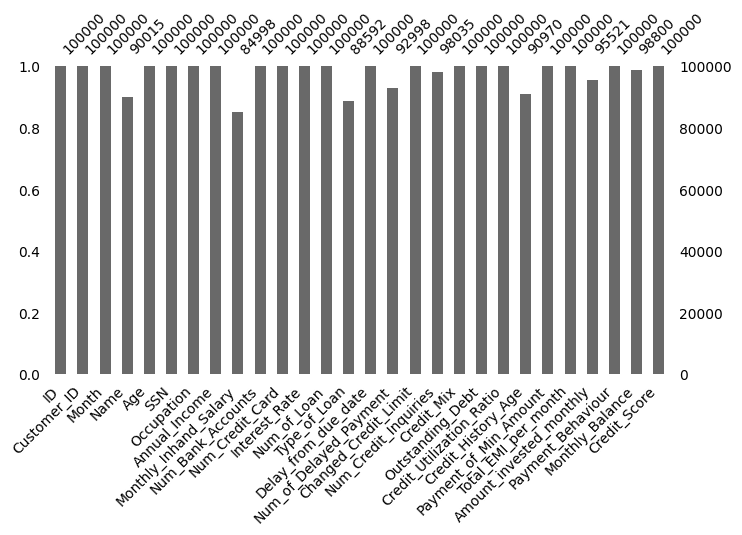

In [7]:
msno.bar(df = df,
         figsize = (8, 4),
         fontsize = 10);

# TEMİZLEME

In [8]:
df['Credit_Mix'] = df.groupby('Customer_ID')['Credit_Mix'].transform(lambda x: x.replace('_', x[x != '_'].iloc[0] if any(x != '_') else '_'))

Bu kod, `Customer_ID`'ye göre gruplandırılmış veri setinde, `Credit_Mix` sütunundaki `'_'` değerlerini her müşteri için geçerli olan ilk değerle doldurmayı amaçlar. Her bir grup için, `'_'` olmayan ilk değeri bulur ve bu değeri `'_'` ile değiştirilen yerlere yerleştirir. Eğer bir grup tamamen `'_'` değerlerinden oluşuyorsa, bu durumda `'_'` değeri olduğu gibi bırakılır. Bu sayede her müşterinin eksik veya hatalı değerleri, o müşteriye ait geçerli bir değerle doldurulmuş olur.

In [9]:
columns_to_drop = ['ID','Customer_ID','Name','SSN','Month','Occupation']
df = df.drop(columns=columns_to_drop, axis = 1)
df.head()

,Age,Annual_Income,Monthly_Inhand_Salary,Num_Bank_Accounts,Num_Credit_Card,Interest_Rate,Num_of_Loan,Type_of_Loan,Delay_from_due_date,Num_of_Delayed_Payment,...,Credit_Mix,Outstanding_Debt,Credit_Utilization_Ratio,Credit_History_Age,Payment_of_Min_Amount,Total_EMI_per_month,Amount_invested_monthly,Payment_Behaviour,Monthly_Balance,Credit_Score
0,23,19114.12,1824.843333,3,4,3,4,"Auto Loan, Credit-Builder Loan, Personal Loan,...",3,7,...,Good,809.98,26.822620,22 Years and 1 Months,No,49.574949,80.41529543900253,High_spent_Small_value_payments,312.49408867943663,Good
1,23,19114.12,NaN,3,4,3,4,"Auto Loan, Credit-Builder Loan, Personal Loan,...",-1,NaN,...,Good,809.98,31.944960,NaN,No,49.574949,118.28022162236736,Low_spent_Large_value_payments,284.62916249607184,Good
2,-500,19114.12,NaN,3,4,3,4,"Auto Loan, Credit-Builder Loan, Personal Loan,...",3,7,...,Good,809.98,28.609352,22 Years and 3 Months,No,49.574949,81.699521264648,Low_spent_Medium_value_payments,331.2098628537912,Good
3,23,19114.12,NaN,3,4,3,4,"Auto Loan, Credit-Builder Loan, Personal Loan,...",5,4,...,Good,809.98,31.377862,22 Years and 4 Months,No,49.574949,199.4580743910713,Low_spent_Small_value_payments,223.45130972736786,Good
4,23,19114.12,1824.843333,3,4,3,4,"Auto Loan, Credit-Builder Loan, Personal Loan,...",6,NaN,...,Good,809.98,24.797347,22 Years and 5 Months,No,49.574949,41.420153086217326,High_spent_Medium_value_payments,341.48923103222177,Good


Bu kod, belirtilen sütunları (`'ID'`, `'Customer_ID'`, `'Name'`, `'SSN'`, `'Month'`, `'Occupation'`) veri setinden (`df`) kaldırır. `drop` fonksiyonu ile `axis=1` parametresi, sütunların silinmesini sağlar. Bu işlemi uygulamama sebebimiz kredi skorunu bu başlıkların etkilemicek olması bu yüzden gereksiz gereken sütunları veri setinden çıkararak daha temiz bir analiz yapılmasını sağlar.

**AGE**

Genel olarak mantık çerçevesinde yaş 20-100 arasındadır.

In [10]:
df['Age'] = pd.to_numeric(df['Age'], errors='coerce') 
df['Age'] = df['Age'].fillna(0).astype('int32')  

In [11]:
df['Age'].unique()

array([  23, -500,    0, ..., 6476, 2263, 1342], dtype=int32)

In [12]:
df['Age'].value_counts().sort_index(ascending=True)

Age
-500      886
 0       4939
 14      1129
 15      1488
 16      1378
         ... 
 8674       1
 8678       1
 8682       1
 8697       1
 8698       1
Name: count, Length: 1662, dtype: int64

In [13]:
df = df[(df['Age']>0) & (df['Age']<=100)]
df['Age'].unique()

array([ 23,  28,  34,  54,  55,  21,  31,  33,  30,  24,  44,  45,  40,
        41,  32,  35,  36,  39,  37,  20,  46,  26,  42,  19,  48,  38,
        43,  22,  16,  18,  15,  27,  25,  14,  17,  47,  53,  56,  29,
        49,  51,  50,  52,  99, 100,  95], dtype=int32)

**Annual income**

In [14]:
df.loc[:, 'Annual_Income'] = df['Annual_Income'].str.rstrip("_")

**Number of Bank Accounts**

In [15]:
df['Num_Bank_Accounts'].value_counts().head(10)

Num_Bank_Accounts
6     11977
7     11843
8     11831
4     11256
5     11209
3     11043
9      5033
10     4856
1      4135
0      3975
Name: count, dtype: int64

In [16]:
df = df[(df['Num_Bank_Accounts'] >= 0) & (df['Num_Bank_Accounts'] <= 20)]

Banka hesabı sayısı 0'dan küçük veya 20'den büyük olan satırlar, DataFrame'den çıkarılır. Bu işlem, veri kümesindeki ekstrem veya hatalı değerleri temizlemek için kullanılır.

**Number of Credit Card**

In [17]:
df['Num_Credit_Card'].value_counts().head(10)

Num_Credit_Card
5     16797
7     15157
6     15057
4     12782
3     12138
8      4524
10     4448
9      4239
2      1946
1      1927
Name: count, dtype: int64

In [18]:
df = df[(df['Num_Credit_Card'] >= 0) & (df['Num_Credit_Card'] <= 15)]

**Number of loans**

In [19]:
df['Num_of_Loan'] = df['Num_of_Loan'].str.rstrip("_")

In [20]:
df['Num_of_Loan'].value_counts().head(10)

Num_of_Loan
3       13461
2       13458
4       13190
0        9670
1        9398
6        6917
7        6542
5        6404
-100     3458
9        3306
Name: count, dtype: int64

In [21]:
df['Num_of_Loan'] = pd.to_numeric(df['Num_of_Loan'], errors='coerce')
df = df[(df['Num_of_Loan'] >= 0) & (df['Num_of_Loan'] <= 10)]

İlk satırda, `df['Num_of_Loan']` (kredi sayısı) sütunundaki veriler, sayısal formata dönüştürülür. `errors='coerce'` parametresi ile, sayıya dönüştürülemeyen değerler `NaN` (eksik değer) olarak atanır. Bu, veri kümesindeki hatalı veya yanlış formatta olan verileri temizler.

İkinci satırda ise, `df` DataFrame'indeki `Num_of_Loan` sütununda kredi sayısı 0 ile 10 arasında olan satırlar filtrelenir. Bu işlem, kredi sayısının mantıklı bir aralıkta olmasını sağlamak için yapılır ve aşırı yüksek veya düşük değerlerin (örneğin, negatif sayılar veya mantıksız kredi sayıları) veri kümesinden çıkarılmasını sağlar.

**Type of Loan**

In [22]:
df['Type_of_Loan'] = df['Type_of_Loan'].fillna('Not Specified')

In [23]:
df['Type_of_Loan'].value_counts().head(30)

Type_of_Loan
Not Specified                                    10858
Student Loan                                      1066
Personal Loan                                     1062
Credit-Builder Loan                               1056
Debt Consolidation Loan                           1056
Payday Loan                                       1017
Auto Loan                                         1001
Mortgage Loan                                      995
Home Equity Loan                                   957
Personal Loan, and Student Loan                    280
Not Specified, and Payday Loan                     228
Mortgage Loan, and Home Equity Loan                227
Credit-Builder Loan, and Not Specified             216
Student Loan, and Payday Loan                      216
Payday Loan, and Debt Consolidation Loan           209
Student Loan, and Credit-Builder Loan              208
Payday Loan, and Personal Loan                     206
Credit-Builder Loan, and Mortgage Loan             2

There are a lot of different types of load, so I will use dummy encoding.

In [24]:
df['Type_of_Loan'] = df['Type_of_Loan'].str.replace('and', ',', regex=False).str.strip()

loan_dummies = df['Type_of_Loan'].str.get_dummies(sep=', ')

print(loan_dummies.columns)

Index(['Auto Loan', 'Credit-Builder Loan', 'Debt Consolidation Loan',
       'Home Equity Loan', 'Mortgage Loan', 'Not Specified', 'Payday Loan',
       'Personal Loan', 'Student Loan'],
      dtype='object')


İlk satırda, `df['Type_of_Loan']` sütunundaki her değerin içinde geçen "and" kelimesi virgül (`,`) ile değiştirilir ve ardından baştaki ve sondaki boşluklar (`str.strip()`) kaldırılır. Bu işlem, kredi türleri arasındaki bağlantıları netleştirir ve daha düzgün bir format sağlar.

İkinci satırda, `df['Type_of_Loan']` sütunundaki her değeri, virgülle ayrılmış birden fazla kredi türü içeriyorsa, her bir türü ayrı sütunlara dönüştürmek için `get_dummies` fonksiyonu kullanılır. Bu, her kredi türü için bir sütun oluşturur ve her satırda bu türlerin var olup olmadığını belirtir (1 veya 0 ile).

Son satırda ise, oluşturulan yeni sütunların isimleri (`loan_dummies.columns`) yazdırılır. Bu, hangi kredi türlerine ait sütunlar oluşturulduğunu görmek için yapılır.

In [25]:
df = pd.concat([df, loan_dummies], axis=1)
df = df.loc[:, ~df.columns.duplicated()]
df = df.loc[:, df.columns != '']
df = df.drop("Type_of_Loan", axis=1)

print(df.columns)

Index(['Age', 'Annual_Income', 'Monthly_Inhand_Salary', 'Num_Bank_Accounts',
       'Num_Credit_Card', 'Interest_Rate', 'Num_of_Loan',
       'Delay_from_due_date', 'Num_of_Delayed_Payment', 'Changed_Credit_Limit',
       'Num_Credit_Inquiries', 'Credit_Mix', 'Outstanding_Debt',
       'Credit_Utilization_Ratio', 'Credit_History_Age',
       'Payment_of_Min_Amount', 'Total_EMI_per_month',
       'Amount_invested_monthly', 'Payment_Behaviour', 'Monthly_Balance',
       'Credit_Score', 'Auto Loan', 'Credit-Builder Loan',
       'Debt Consolidation Loan', 'Home Equity Loan', 'Mortgage Loan',
       'Not Specified', 'Payday Loan', 'Personal Loan', 'Student Loan'],
      dtype='object')


**Num_of_Delayed_Payment**

In [26]:
df['Num_of_Delayed_Payment'].value_counts().head(30)

Num_of_Delayed_Payment
17    4493
19    4487
10    4403
16    4359
18    4343
15    4311
12    4226
20    4221
9     4103
8     4016
11    3990
14    3462
13    3376
21    2152
7     1955
22    1928
6     1904
5     1748
23    1682
3     1578
4     1531
2     1505
24    1384
25    1358
1     1341
0     1326
26     272
-1     259
27     195
-2     190
Name: count, dtype: int64

In [27]:
df['Num_of_Delayed_Payment'] = df['Num_of_Delayed_Payment'].str.rstrip("_")
df['Num_of_Delayed_Payment'] = pd.to_numeric(df['Num_of_Delayed_Payment'], errors='coerce')
df['Num_of_Delayed_Payment'] = df['Num_of_Delayed_Payment'].fillna(0).astype('int32') 

df = df[(df['Num_of_Delayed_Payment'] >= 0)]

**Changed_Credit_Limit**

In [28]:
df['Changed_Credit_Limit'].value_counts().head(10)

Changed_Credit_Limit
_        1773
8.22      119
11.5      112
10.06     107
11.32     106
7.35      101
1.63       97
8.23       96
11.49      95
7.33       93
Name: count, dtype: int64

In [29]:
df['Changed_Credit_Limit'] = df['Changed_Credit_Limit'].replace("_",np.nan)

**Credit_Mix**

In [30]:
df['Credit_Mix'].value_counts().head(30)

Credit_Mix
Standard    39121
Good        25255
Bad         20258
Name: count, dtype: int64

In [31]:
df['Credit_Mix'] = df['Credit_Mix'].replace("_",np.nan)
df['Credit_Mix'].unique()

array(['Good', 'Standard', 'Bad'], dtype=object)

**Credit_History_Age**

In [32]:
df['Credit_History_Age'].value_counts().head(10)

Credit_History_Age
15 Years and 11 Months    382
19 Years and 5 Months     380
18 Years and 4 Months     378
15 Years and 9 Months     378
17 Years and 9 Months     378
17 Years and 10 Months    370
19 Years and 4 Months     368
15 Years and 10 Months    368
19 Years and 3 Months     368
17 Years and 11 Months    366
Name: count, dtype: int64

In [33]:
import pandas as pd
import numpy as np
from dateutil.relativedelta import relativedelta

# Funkcja do konwersji tekstu na liczbę miesięcy
def convert_to_months(value):
    if pd.isna(value):
        return np.nan
    # Rozbij tekst na lata i miesiące
    parts = value.split(" and ")
    years = 0
    months = 0

    for part in parts:
        if 'Year' in part:
            years = int(part.split()[0])
        elif 'Month' in part:
            months = int(part.split()[0])
    
    # Oblicz liczbę miesięcy
    total_months = years * 12 + months
    return total_months

# Zastosuj funkcję do kolumny 'Credit_History_Age'
df['Credit_History_Age_Months'] = df['Credit_History_Age'].apply(convert_to_months)

# Sprawdź wyniki
df[['Credit_History_Age', 'Credit_History_Age_Months']].head()

,Credit_History_Age,Credit_History_Age_Months
0,22 Years and 1 Months,265.0
1,NaN,NaN
3,22 Years and 4 Months,268.0
4,22 Years and 5 Months,269.0
5,22 Years and 6 Months,270.0


Bu kod, `Credit_History_Age` sütunundaki metin şeklindeki yıl ve ay ifadelerini, toplam ay cinsinden sayısal bir değere dönüştürmek amacıyla yazılmıştır. Verilerin daha tutarlı bir şekilde analiz edilmesi için metin formatındaki "X Years and Y Months" gibi ifadeler, toplam ay sayısına dönüştürülerek yeni bir sütun olan `Credit_History_Age_Months`'a kaydedilmiştir. Böylece, bu tarihsel veriler sayısal hale getirilmiş ve analizde daha kolay kullanılabilir hale getirilmiştir.

In [34]:
df = df.drop(['Credit_History_Age'], axis=1)
df.head()

,Age,Annual_Income,Monthly_Inhand_Salary,Num_Bank_Accounts,Num_Credit_Card,Interest_Rate,Num_of_Loan,Delay_from_due_date,Num_of_Delayed_Payment,Changed_Credit_Limit,...,Auto Loan,Credit-Builder Loan,Debt Consolidation Loan,Home Equity Loan,Mortgage Loan,Not Specified,Payday Loan,Personal Loan,Student Loan,Credit_History_Age_Months
0,23,19114.12,1824.843333,3,4,3,4,3,7,11.27,...,1,1,0,1,0,0,0,1,0,265.0
1,23,19114.12,NaN,3,4,3,4,-1,0,11.27,...,1,1,0,1,0,0,0,1,0,NaN
3,23,19114.12,NaN,3,4,3,4,5,4,6.27,...,1,1,0,1,0,0,0,1,0,268.0
4,23,19114.12,1824.843333,3,4,3,4,6,0,11.27,...,1,1,0,1,0,0,0,1,0,269.0
5,23,19114.12,NaN,3,4,3,4,8,4,9.27,...,1,1,0,1,0,0,0,1,0,270.0


**Payment_of_Min_Amount**

In [35]:
df['Payment_of_Min_Amount'].value_counts().head(10)
#im not sure what NM means

Payment_of_Min_Amount
Yes    44636
No     29832
NM     10166
Name: count, dtype: int64

**Amount_invested_monthly**

In [36]:
df['Amount_invested_monthly'].value_counts().head(10)

Amount_invested_monthly
__10000__             3601
0.0                    136
455.2640222108063        1
210.40211035371743       1
250.3692804027029        1
210.40376947632168       1
144.41402937999322       1
49.737833114851476       1
14.95420738488744        1
121.04888416553423       1
Name: count, dtype: int64

In [37]:
df['Amount_invested_monthly'] = df['Amount_invested_monthly'].replace('__10000__',np.nan)

**Payment_Behaviour**

In [38]:
df['Payment_Behaviour'].value_counts().head(10)

Payment_Behaviour
Low_spent_Small_value_payments      21575
High_spent_Medium_value_payments    14869
Low_spent_Medium_value_payments     11772
High_spent_Large_value_payments     11532
High_spent_Small_value_payments      9614
Low_spent_Large_value_payments       8854
!@9#%8                               6418
Name: count, dtype: int64

In [39]:
df['Payment_Behaviour'] = df['Payment_Behaviour'].replace('!@9#%8',np.nan)

**Monthly_Balance**

In [40]:
df['Monthly_Balance'] = df['Monthly_Balance'].replace('__-333333333333333333333333333__',np.nan)

In [41]:
df['Monthly_Balance'].value_counts().head(10)

Monthly_Balance
312.49408867943663    1
251.67631031607414    1
111.99052062106064    1
299.5453745546086     1
604.3402008638865     1
347.413889978152      1
589.6993420195964     1
486.0168700694348     1
318.93376172740835    1
319.9756576775843     1
Name: count, dtype: int64

**Change to numeric values**

In [42]:
import pandas as pd

# Listy kolumn do konwersji
columns_to_float = ['Annual_Income','Monthly_Inhand_Salary', 'Changed_Credit_Limit', 
                    'Num_Credit_Inquiries', 'Outstanding_Debt', 
                    'Credit_Utilization_Ratio', 'Total_EMI_per_month', 
                    'Amount_invested_monthly','Monthly_Balance']

columns_to_int = ['Num_Bank_Accounts', 'Delay_from_due_date', 'Credit_History_Age_Months', 'Age', 'Num_of_Delayed_Payment']

# Konwersja kolumn do float
for column in columns_to_float:
    df[column] = pd.to_numeric(df[column], errors='coerce')  # Umożliwia konwersję wartości
    df[column] = df[column].fillna(0).astype('float64')  # Używamy float32 dla wartości zmiennoprzecinkowych

# Konwersja kolumn do int
for column in columns_to_int:
    df[column] = pd.to_numeric(df[column], errors='coerce')
    df[column] = df[column].fillna(0).astype('int64')  # Upewniamy się, że NaN jest zamieniane na 0

# Sprawdzenie typów danych po konwersji
print(df[columns_to_float + columns_to_int].dtypes)

Annual_Income                float64
Monthly_Inhand_Salary        float64
Changed_Credit_Limit         float64
Num_Credit_Inquiries         float64
Outstanding_Debt             float64
Credit_Utilization_Ratio     float64
Total_EMI_per_month          float64
Amount_invested_monthly      float64
Monthly_Balance              float64
Num_Bank_Accounts              int64
Delay_from_due_date            int64
Credit_History_Age_Months      int64
Age                            int64
Num_of_Delayed_Payment         int64
dtype: object


Bu kod, belirli sütunlardaki verileri doğru veri tiplerine dönüştürmek için yazılmıştır. `columns_to_float` ve `columns_to_int` listelerinde belirtilen sütunlardaki veriler, sırasıyla `float64` ve `int64` veri tiplerine dönüştürülmektedir. Bu işlem, verilerin analiz ve modelleme aşamalarında daha tutarlı ve doğru sonuçlar elde edilmesini sağlar. `pd.to_numeric()` fonksiyonu ile geçersiz veriler `NaN` olarak işaretlenip, ardından `fillna(0)` ile eksik değerler sıfırla doldurulmaktadır. Son olarak, her sütunun doğru veri tipi ile güncellenmesi sağlanarak, veri çerçevesinin tipi kontrol edilmektedir.

**Checking null values**

In [43]:
missing_count = df.isnull().sum()
value_count = df.isnull().count()
missing_percentage = round(missing_count / value_count * 100, 2)
missing_df = pd.DataFrame({"count": missing_count, "percentage": missing_percentage})
missing_df

,count,percentage
Age,0,0.00
Annual_Income,0,0.00
Monthly_Inhand_Salary,0,0.00
Num_Bank_Accounts,0,0.00
Num_Credit_Card,0,0.00
Interest_Rate,0,0.00
Num_of_Loan,0,0.00
Delay_from_due_date,0,0.00
Num_of_Delayed_Payment,0,0.00
Changed_Credit_Limit,0,0.00


Payment_Behaviour ile yapabileceğimiz tek şey eksik değerleri kaldırmaktır.

In [44]:
df = df.dropna(subset=['Payment_Behaviour'])

missing_count = df.isnull().sum()
value_count = df.isnull().count()
missing_percentage = round(missing_count / value_count * 100, 2)
missing_df = pd.DataFrame({"count": missing_count, "percentage": missing_percentage})

missing_df

,count,percentage
Age,0,0.0
Annual_Income,0,0.0
Monthly_Inhand_Salary,0,0.0
Num_Bank_Accounts,0,0.0
Num_Credit_Card,0,0.0
Interest_Rate,0,0.0
Num_of_Loan,0,0.0
Delay_from_due_date,0,0.0
Num_of_Delayed_Payment,0,0.0
Changed_Credit_Limit,0,0.0


Bu kod, `Payment_Behaviour` sütununda eksik (NaN) değerlere sahip satırları veri çerçevesinden çıkarır. Ardından, tüm veri çerçevesindeki her sütundaki eksik değerlerin sayısını ve yüzdesini hesaplar. `missing_count`, her sütundaki eksik değer sayısını, `value_count` ise toplam değer sayısını verir. Bu veriler, `missing_percentage` ile eksik değerlerin yüzde oranına dönüştürülür. Son olarak, `missing_df` adlı bir DataFrame oluşturularak, her sütun için eksik değerlerin sayısı ve yüzdesi gösterilir. Bu işlem, veri setindeki eksik değerlerin durumunu analiz etmek için yapılır.

**Categorical values**

In [45]:
df.loc[:, 'Payment_of_Min_Amount'] = df['Payment_of_Min_Amount'].map({'Yes': 2, 'No': 1, 'NM': 0})
df.loc[:, 'Payment_of_Min_Amount'] = pd.to_numeric(df['Payment_of_Min_Amount'], downcast='integer')


Bu kod, **`Payment_of_Min_Amount`** sütunundaki kategorik verileri ('Yes', 'No', 'NM') sayısal verilere (2, 1, 0) dönüştürür. İlk satırda **`.map()`** fonksiyonu kullanılarak kategorik veriler sayısallara çevrilir, ikinci satırda ise **`pd.to_numeric()`** ile sayılar tam sayılara dönüştürülür ve bellek verimliliği sağlanır. Ayrıca, **`loc[]`** kullanımı ile veri doğrudan DataFrame üzerinde güncellenir,

In [46]:
df.loc[:, 'Credit_Mix'] = df['Credit_Mix'].map({'Good': 2, 'Standard': 1, 'Bad': 0})
df.loc[:, 'Credit_Mix'] = pd.to_numeric(df['Credit_Mix'], downcast='integer')


In [47]:
payment_behaviour_mapping = {
    'Low_spent_Small_value_payments': 1,
    'Low_spent_Medium_value_payments': 2,
    'Low_spent_Large_value_payments': 3,
    'High_spent_Small_value_payments': 4,
    'High_spent_Medium_value_payments': 5,
    'High_spent_Large_value_payments': 6
}

df['Payment_Behaviour_encoded'] = df['Payment_Behaviour'].map(payment_behaviour_mapping)
df['Payment_Behaviour_encoded'] = pd.to_numeric(df['Payment_Behaviour_encoded'], downcast='integer')

print(df[['Payment_Behaviour', 'Payment_Behaviour_encoded']].head())

                  Payment_Behaviour  Payment_Behaviour_encoded
0   High_spent_Small_value_payments                          4
1    Low_spent_Large_value_payments                          3
3    Low_spent_Small_value_payments                          1
4  High_spent_Medium_value_payments                          5
6    Low_spent_Small_value_payments                          1


Bu kod, **`Payment_Behaviour`** sütunundaki kategorik değerleri (örneğin 'Low_spent_Small_value_payments') sayısal verilere dönüştürmek için **`map()`** fonksiyonunu kullanır. Bu sayısal değerler daha sonra **`pd.to_numeric()`** ile tam sayılara dönüştürülüp bellek verimliliği sağlanır. Sonuç olarak, **`Payment_Behaviour`** sütunundaki kategorik veriler, modelleme veya analiz için uygun sayısal verilere dönüştürülmüş olur.

In [48]:
df = df.drop("Payment_Behaviour", axis=1)
df = df.rename(columns={'Not Specified': 'Not Specified Loan'})

columns = df.columns.tolist()  # Przekształcenie indeksu kolumn w listę
columns.append(columns.pop(columns.index('Credit_Score')))  # Przeniesienie kolumny na koniec
# Ponowne przypisanie zaktualizowanej kolejności kolumn
df = df[columns]

print(df.columns)

Index(['Age', 'Annual_Income', 'Monthly_Inhand_Salary', 'Num_Bank_Accounts',
       'Num_Credit_Card', 'Interest_Rate', 'Num_of_Loan',
       'Delay_from_due_date', 'Num_of_Delayed_Payment', 'Changed_Credit_Limit',
       'Num_Credit_Inquiries', 'Credit_Mix', 'Outstanding_Debt',
       'Credit_Utilization_Ratio', 'Payment_of_Min_Amount',
       'Total_EMI_per_month', 'Amount_invested_monthly', 'Monthly_Balance',
       'Auto Loan', 'Credit-Builder Loan', 'Debt Consolidation Loan',
       'Home Equity Loan', 'Mortgage Loan', 'Not Specified Loan',
       'Payday Loan', 'Personal Loan', 'Student Loan',
       'Credit_History_Age_Months', 'Payment_Behaviour_encoded',
       'Credit_Score'],
      dtype='object')


Bu kod, **`df`** veri çerçevesindeki **`Payment_Behaviour`** sütununu kaldırarak, **`Not Specified`** sütununu **`Not Specified Loan`** olarak yeniden adlandırır ve sütun sırasını düzenler. **`Credit_Score`** sütunu, sütun sıralamasını değiştiren bir işlemle listenin sonuna taşınır. Bu işlemler, veri çerçevesindeki gereksiz sütunları kaldırmak, sütun isimlerini daha anlamlı hale getirmek ve veri setindeki sütun sırasını belirli bir düzene sokmak amacıyla yapılır.çin yapılır.

In [49]:
columns_to_change = ['Credit_Mix','Payment_Behaviour_encoded','Payment_of_Min_Amount']
df[columns_to_change] = df[columns_to_change].fillna(0).astype('int64')

/tmp/ipykernel_17/2275920381.py:2: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df[columns_to_change] = df[columns_to_change].fillna(0).astype('int64')


In [50]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 78216 entries, 0 to 99998
Data columns (total 30 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Age                        78216 non-null  int64  
 1   Annual_Income              78216 non-null  float64
 2   Monthly_Inhand_Salary      78216 non-null  float64
 3   Num_Bank_Accounts          78216 non-null  int64  
 4   Num_Credit_Card            78216 non-null  int64  
 5   Interest_Rate              78216 non-null  int64  
 6   Num_of_Loan                78216 non-null  int64  
 7   Delay_from_due_date        78216 non-null  int64  
 8   Num_of_Delayed_Payment     78216 non-null  int64  
 9   Changed_Credit_Limit       78216 non-null  float64
 10  Num_Credit_Inquiries       78216 non-null  float64
 11  Credit_Mix                 78216 non-null  int64  
 12  Outstanding_Debt           78216 non-null  float64
 13  Credit_Utilization_Ratio   78216 non-null  float64


# EDA

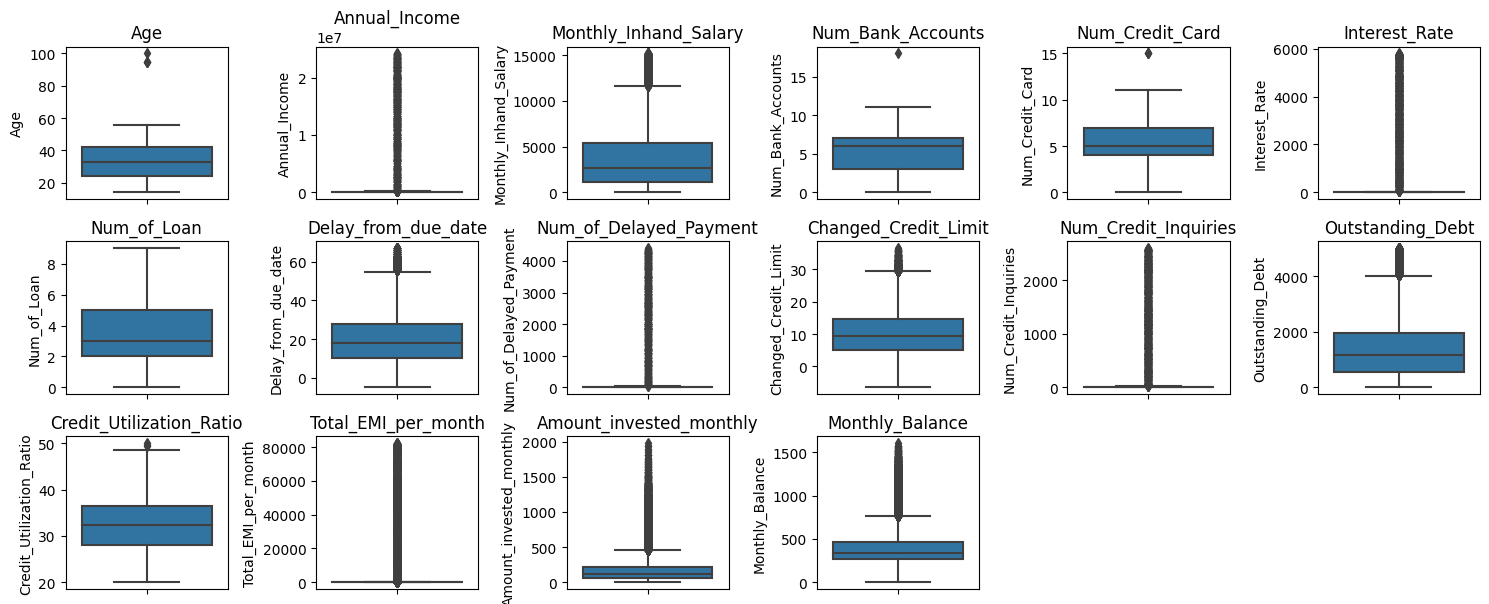

In [51]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming 'df' is your DataFrame already loaded
# List of numerical columns to plot
numerical_columns = ['Age', 'Annual_Income', 'Monthly_Inhand_Salary', 
                     'Num_Bank_Accounts', 'Num_Credit_Card', 'Interest_Rate', 
                     'Num_of_Loan', 'Delay_from_due_date', 'Num_of_Delayed_Payment', 
                     'Changed_Credit_Limit', 'Num_Credit_Inquiries', 'Outstanding_Debt', 
                     'Credit_Utilization_Ratio', 'Total_EMI_per_month', 
                     'Amount_invested_monthly', 'Monthly_Balance']

# Convert columns to numeric (force errors to NaN)
df[numerical_columns] = df[numerical_columns].apply(pd.to_numeric, errors='coerce')

# Remove rows with NaN values (if you want to)
# df.dropna(subset=numerical_columns, inplace=True)

# Set the size of the overall plot
plt.figure(figsize=(15, 10))

# Loop through each column in numerical_columns and create a boxplot
for i, column in enumerate(numerical_columns):
    plt.subplot(5, 6, i + 1)  # Create subplots in a grid (adjust rows and columns as needed)
    sns.boxplot(data=df, y=column)  # Corrected to pass 'data' and 'y'
    plt.title(column)  # Title for each subplot

# Adjust layout for spacing and display the plot
plt.tight_layout()

# Show the plot
plt.show()


Veri setindeki sayısal değişkenlerin kutu grafiklerini (boxplot) oluşturur ve her bir sayısal özelliğin dağılımını görselleştirir. Bu tür görselleştirmeler, veri analizi ve keşif aşamasında, her değişkenin temel özelliklerini ve olası anormalliklerini anlamaya yardımcı olur. Veri setindeki her sütun için bir kutu grafiği oluşturulacaktır. Kutu grafiği, verinin merkezi eğilim, yayılma ve olası uç değerler (outliers) hakkında önemli bilgiler sunar.

### Genel Olarak Çıkarılabilecek Sonuçlar:
1. **Dağılım ve Merkezsel Eğilim**:
   - **Kutu ve Orta Çizgi**: Kutu grafiğinde, kutu içindeki çizgi medyanı gösterir ve bu, veri setindeki merkezi eğilimi temsil eder. Eğer medyan, kutunun ortasında yer alıyorsa, veri simetrik bir dağılıma sahip olabilir.
   
2. **Uç Değerler (Outliers)**:
   - Kutu grafiğinde, kutunun dışındaki noktalar genellikle "uç değerler" olarak kabul edilir. Bu noktalar, normal dağılımdan sapmış, olağan dışı gözlemler olabilir.
   - Örneğin, `Annual_Income` (Yıllık Gelir) gibi bir değişkenin uç değerleri, çok yüksek gelirleri olan bireyleri gösterebilir. Benzer şekilde, `Delay_from_due_date` (Vade Sonrası Gecikme) gibi bir değişkenin uç değerleri, çok fazla ödeme gecikmesi yaşayan bireyleri gösterebilir.

3. **Değişkenler Arası Farklar**:
   - Sayısal değişkenler arasındaki farkları görmek için kutu grafiklerinin karşılaştırılması, bazı değişkenlerin birbirine daha yakın ve simetrik bir dağılıma sahip olduğunu, bazılarının ise çok daha yaygın veya çarpık bir dağılım sergilediğini ortaya koyabilir.
   - Örneğin, `Credit_Utilization_Ratio` (Kredi Kullanım Oranı) genellikle 0 ile 1 arasında değişir, ancak daha fazla uç değer içeriyor olabilir, bu da kullanıcıların yüksek kredi borcu taşıma eğiliminde olduklarını gösteriyor olabilir.

4. **Gecikmeler ve Borçlar**:
   - `Num_of_Delayed_Payment` (Gecikmiş Ödeme Sayısı) ve `Outstanding_Debt` (Ödenmemiş Borçlar) gibi değişkenlerdeki uç değerler, ödeme gecikmesi yaşayan veya ödenmemiş borçları olan bireyleri gösterebilir. Bu tür gözlemler, kredi riskini ve müşteri ödeme alışkanlıklarını anlamada yardımcı olabilir.
   
5. **Finansal Sağlık ve Riskler**:
   - `Credit_Utilization_Ratio`, `Total_EMI_per_month` (Aylık Taksit Miktarı), `Monthly_Balance` gibi değişkenler, bireylerin finansal durumlarını gösteren önemli göstergelerdir. Bu özelliklerin kutu grafikleri, finansal riskleri ve bireylerin ödeme düzenlerini incelemek için yararlı olabilir.
   
### Önerilen Yaklaşımlar:
- **Veri Temizliği**: Eğer kutu grafiklerinde çok fazla uç değer görünüyorsa, veri temizliği yapmak ve uç değerleri incelemek önemlidir. Uç değerler bazen yanlış veri girişi olabilir veya gerçek dünyada olağan dışı ancak geçerli değerler olabilir.
- **Anlamlı Analizler**: Bu kutu grafiklerinden elde edilen bilgileri, özellikle finansal analizlerde, kullanıcıların kredi risklerini, ödeme davranışlarını ve finansal sağlıklarını daha iyi anlayabilmek için kullanabilirsiniz.
   
Sonuç olarak, kutu grafiklerinden çıkacak yorumlar veri setindeki sayısal değişkenlerin dağılımını, uç değerleri ve merkezi eğilimlerini incelemeye yöneliktir. Bu görselleştirmeler, daha ileri analizler veya modelleme için bir temel oluşturabilir.

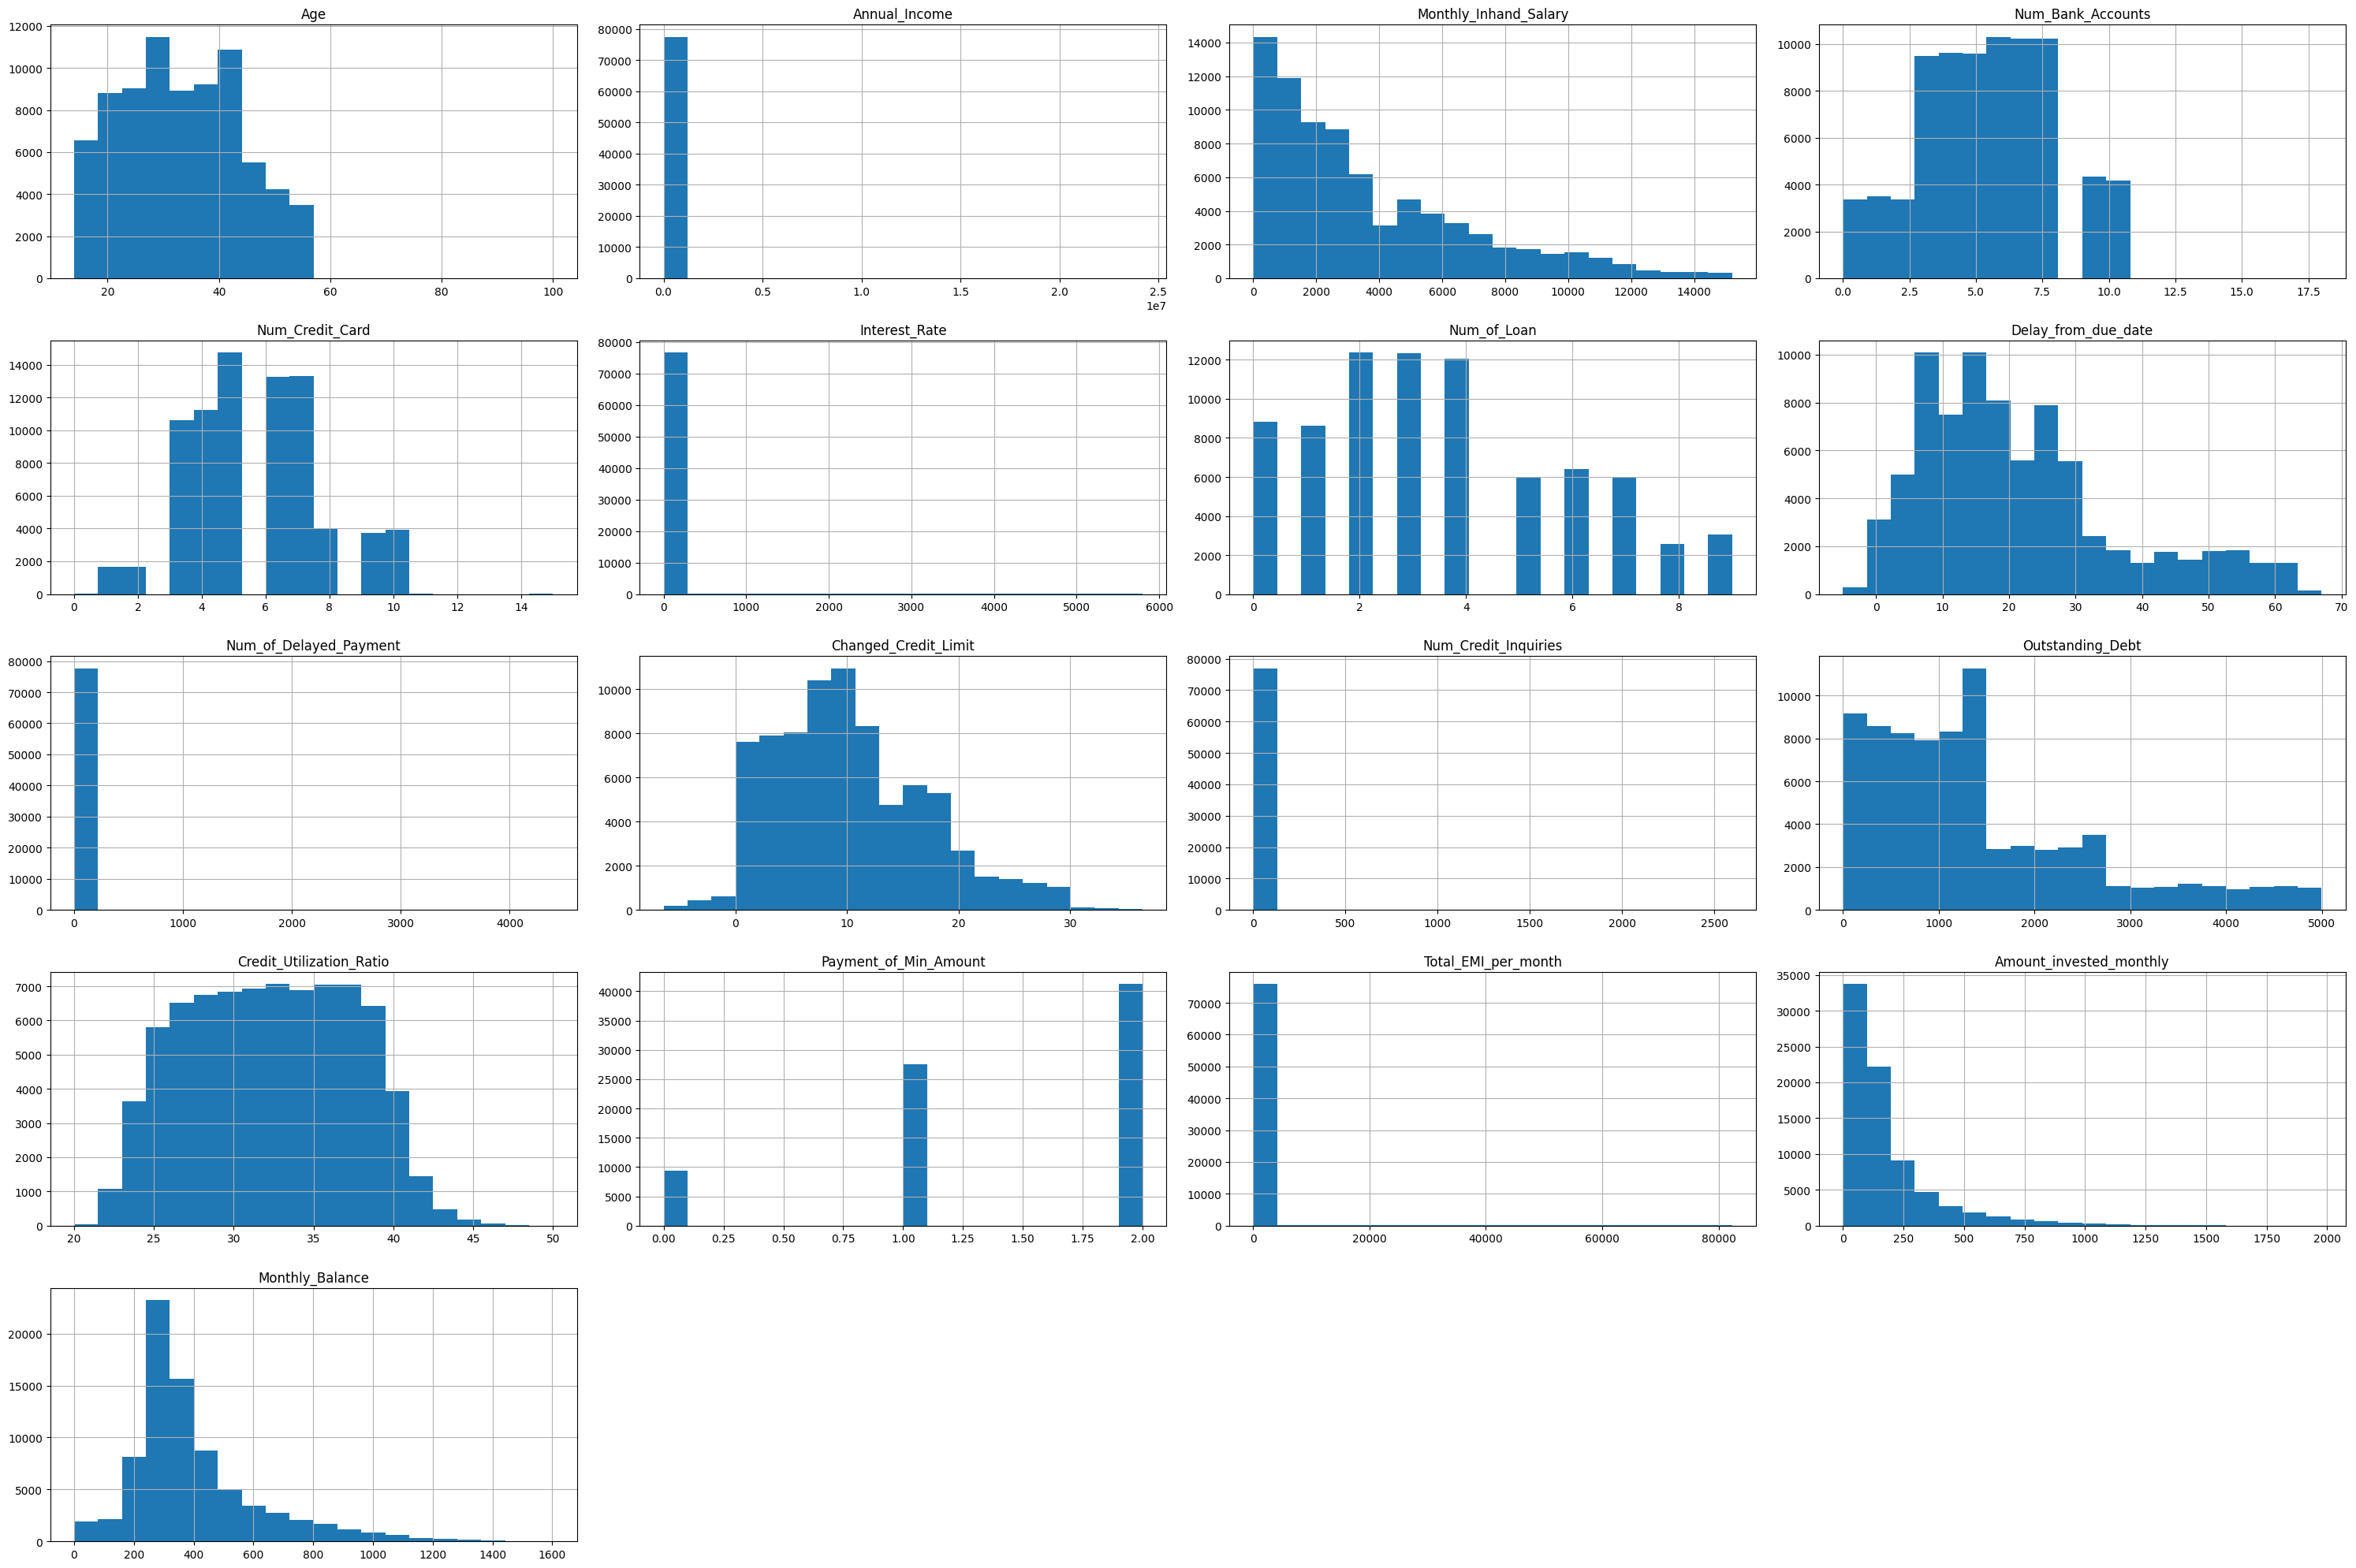

In [52]:
import matplotlib.pyplot as plt

# Lista kolumn numerycznych
numerical_columns = ['Age', 'Annual_Income', 'Monthly_Inhand_Salary', 
                   'Num_Bank_Accounts', 'Num_Credit_Card', 'Interest_Rate', 
                   'Num_of_Loan', 'Delay_from_due_date', 'Num_of_Delayed_Payment', 
                   'Changed_Credit_Limit', 'Num_Credit_Inquiries', 'Outstanding_Debt', 
                   'Credit_Utilization_Ratio', 'Payment_of_Min_Amount', 'Total_EMI_per_month', 
                   'Amount_invested_monthly', 'Monthly_Balance']

# Tworzenie histogramów
df[numerical_columns].hist(bins=20, figsize=(30, 20))
plt.tight_layout()
plt.show()

Veri setindeki sayısal değişkenlerin her biri için histogramlar oluşturur ve bu histogramlar verilerin dağılımını görselleştirir. Histogramlar, her değişkenin değerlerinin sıklıklarını veya yoğunluklarını gösteren grafiklerdir. Histogramlar, veri setinin özelliklerini anlamada yardımcı olur ve dağılımın simetrik mi, çarpık mı, ya da normal dağılıma yakın mı olduğunu gösterebilir.

### Histogramların Sağladığı Bilgiler:

1. **Dağılım ve Yoğunluk**:
   - Histogramlar, her değişkenin değer aralıklarını (bins) gösterir. Her bir "bin", belirli bir değer aralığındaki gözlemleri temsil eder. 
   - Eğer bir değişkenin histogramı tek bir tepe noktası etrafında yoğunlaşmışsa, bu veri setinin bu değere yakın olduğunu ve dağılımın daha sıkı olduğunu gösterir.
   
2. **Simetriklik veya Çarpıklık**:
   - **Simetrik Dağılım**: Eğer histogramın iki tarafı birbirine benziyorsa, yani soldan sağa doğru simetrik bir dağılım varsa, bu dağılımın normal veya Gauss dağılımına yakın olduğunu gösterir.
   - **Sağa Çarpık Dağılım (Pozitif Çarpıklık)**: Eğer histogramın sağ tarafı (büyük değerler) daha uzun ve genişse, bu değişkenin sağa çarpık (pozitif çarpıklık) bir dağılım gösterdiğini gösterir. Bu genellikle yüksek değerlerin nadiren ortaya çıktığı durumlarda görülür.
   - **Sola Çarpık Dağılım (Negatif Çarpıklık)**: Eğer histogramın sol tarafı (küçük değerler) daha uzun ve genişse, bu durumda sola çarpık (negatif çarpıklık) bir dağılım söz konusu olabilir.

3. **Frekans ve Yoğunluk**:
   - Histogramlar, her binin yüksekliğiyle hangi değer aralığındaki gözlemlerin daha sık olduğunu gösterir. Eğer bir binin yüksekliği çok fazlaysa, o aralıktaki değerlerin daha yaygın olduğunu anlayabiliriz.
   - Örneğin, `Age` (Yaş) değişkeni, genellikle genç yaşların daha yoğun olduğu bir dağılıma sahip olabilir ve bu durumda histogramda küçük yaş grupları daha yüksek sıklıkta görünebilir.

4. **Çok Modlu Dağılım**:
   - Eğer histogramda birden fazla tepe noktası (bivaryant dağılım) görüyorsanız, bu değişkenin çok modlu (çok tepe noktası olan) bir dağılım gösterdiğini gösterebilir. Bu, örneğin, belirli yaş aralıklarındaki bireylerin yoğun olmasından kaynaklanabilir.

### Değişken Bazında Olası Yorumlar:

- **`Age` (Yaş)**: Bu değişkenin histogramı, örneğin daha genç bireylerin yoğun olduğu bir dağılım gösterebilir, ancak yaş aralığının genişliği de önemli bir gösterge olabilir.
- **`Annual_Income` (Yıllık Gelir)**: Yıllık gelirde genellikle sağa çarpık bir dağılım görülebilir. Çoğu insanın geliri orta seviyelerdeyken, çok yüksek gelirli bireyler nadir olabilir.
- **`Credit_Utilization_Ratio` (Kredi Kullanım Oranı)**: Bu değişkenin histogramı, kullanıcıların kredi limitlerini nasıl kullandıklarını gösterebilir. Genellikle, düşük kredi kullanım oranına sahip bireyler çoğunlukta olabilir, ancak bazı uç değerler de bulunabilir.
- **`Num_of_Loan` (Kredi Sayısı)**: Kredi sayısının çoğunlukla düşük olduğunu ve bazı bireylerin daha fazla krediye sahip olduğunu gösteren bir dağılım görülebilir.
- **`Outstanding_Debt` (Ödenmemiş Borç)**: Bu değişkenin histogramı, çoğu bireyin düşük borç taşıdığı ancak bazı kişilerin yüksek borçlara sahip olduğu sağa çarpık bir dağılım sergileyebilir.

### Sonuç olarak:
Histogramlar, verilerin dağılımını analiz etmenin etkili bir yoludur. Bu grafiklerden elde edilen bilgiler, modelleme veya veri temizleme aşamalarında nasıl ilerlemeniz gerektiği konusunda önemli ipuçları sağlar. Örneğin, sağa çarpık dağılım gösteren değişkenlerde, daha doğru analizler yapmak için veriyi dönüştürmeyi veya normalleştirmeyi düşünebilirsiniz.

# Model Önerisi

**Model Önerisi: Random Forest Classifier**

**Neden?**

1. **Veri Çeşitliliği ve Karmaşıklığına Uygunluk**: Kredi skoru tahmin etmek için kullanılan veri setlerinde genellikle çok sayıda sayısal ve kategorik özellik bulunur (örneğin, yaş, gelir, borç miktarı, kredi kartı sayısı). Random Forest, hem sayısal hem de kategorik verilerle çok iyi çalışabilir ve karmaşık ilişkileri öğrenebilir.

2. **Aşırı Öğrenme (Overfitting) ile Başa Çıkma**: Random Forest, karar ağaçlarının topluluğudur ve her ağaç farklı veri alt kümelerinde eğitim alır, bu sayede overfitting riskini azaltır. Bu, kredi skoru gibi genellikle dengeli ve büyük veri setlerinde önemli bir avantajdır.

3. **Kolay Hiperparametre Ayarı ve Esneklik**: Random Forest, model parametrelerinin ayarını yapmayı kolaylaştıran esnek bir modeldir. `max_depth`, `min_samples_split` gibi parametrelerle modelin karmaşıklığını kontrol edebiliriz. Ayrıca, `n_estimators` gibi parametreler ile modelin doğruluğu artırılabilir.

4. **Yüksek Performans**: Random Forest, genellikle yüksek doğruluk oranlarıyla sonuç verir ve çoğu sınıflandırma probleminde iyi performans gösterir.

5. **Özelliklerin Önemini Hesaplama**: Random Forest, her bir özelliğin modele olan katkısını değerlendirebilir, bu da kredi skoru tahmini yaparken hangi faktörlerin daha etkili olduğunu anlamamıza yardımcı olur.

Bu nedenlerden dolayı **Random Forest Classifier**, kredi skoru sınıflandırma problemi için güçlü ve sağlam bir seçenek olarak öne çıkar.